# Two Simple Ways of Pandas Data Grouping of Similar Names

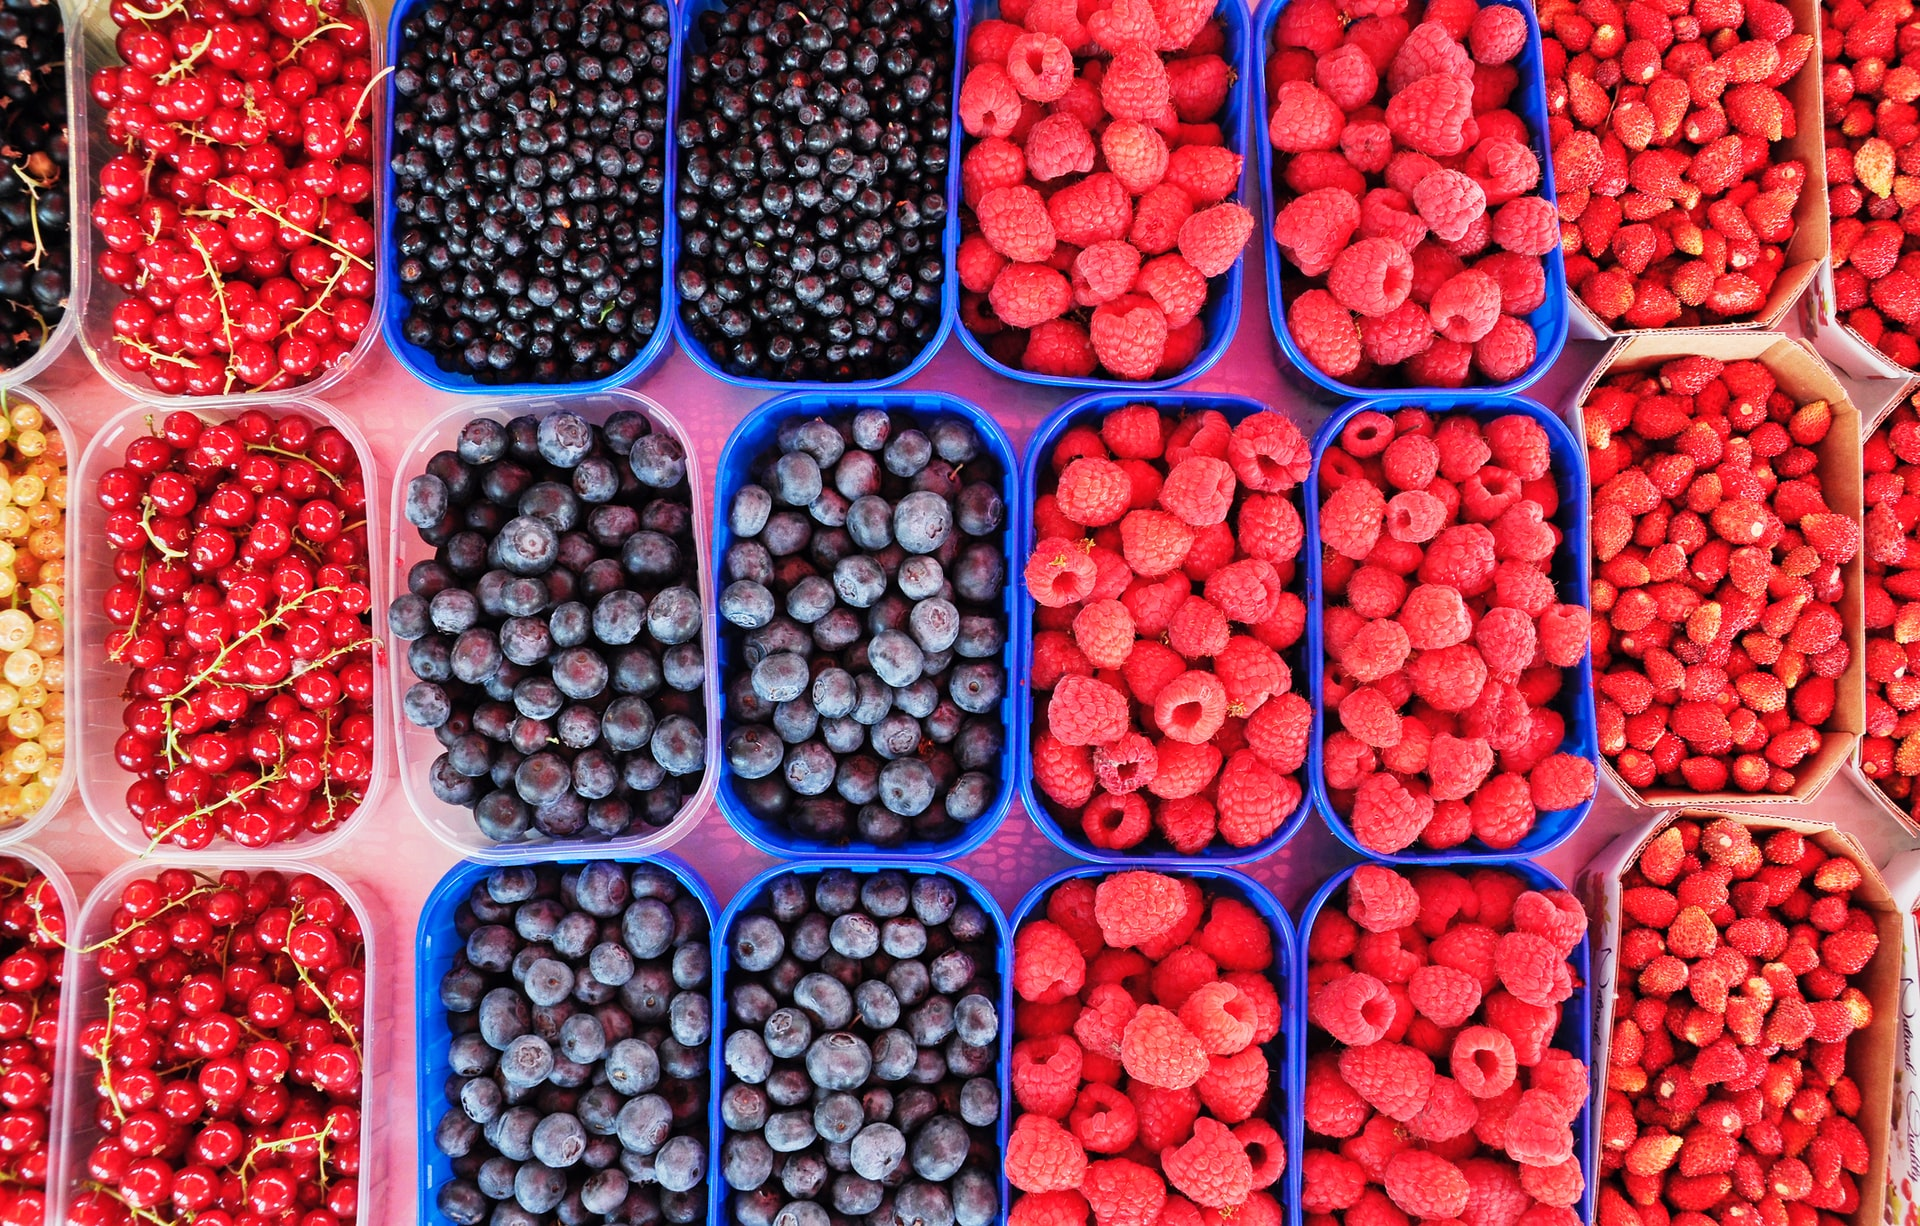
Photo by Alex Block

Often, there will be a need to clean the data after it is downloaded in order to proceed to analysis.  
In this article, I will try two different ways to group data of similar entries, by using pandas replace() and numpy select() function.

Reference:  
https://scotch.io/tutorials/an-introduction-to-regex-in-python    
https://regex101.com/  
https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf  
https://pbpython.com/text-cleaning.html

In [1]:
import pandas as pd
import numpy as np

In [52]:
# download at https://data.iowa.gov/Sales-Distribution/2019-Iowa-Liquor-Sales/38x4-vs5h
df = pd.read_csv('2019_Iowa_Liquor_Sales.csv') 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380345 entries, 0 to 2380344
Data columns (total 25 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               float64
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      float64
 19  State Bottle Retail    float64
 20  Bottles Sold           int64  
 21  Sale (Dollars)         float64
 22  Volume Sold (Liter

In [15]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),new_store_name
0,INV-16681900011,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,Hennessy VS,24,200,6.24,9.36,24,224.64,4.8,1.26,Sauce
1,INV-16681900027,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,Jose Cuervo Especial Reposado Mini,12,500,11.50,17.25,12,207.00,6.0,1.58,Sauce
2,INV-16681900018,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,Lauder's,24,375,3.21,4.82,24,115.68,9.0,2.37,Sauce
3,INV-16685400036,01/02/2019,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001.0,NaN,31.0,DUBUQUE,...,Five O'Clock Vodka,12,1000,4.17,6.26,12,75.12,12.0,3.17,Hy-Vee
4,INV-16690300035,01/02/2019,4449,Kum & Go #121 / Urbandale,12041 Douglas Pkwy,Urbandale,50322.0,NaN,77.0,POLK,...,Hawkeye Vodka,24,375,1.86,2.79,24,66.96,9.0,2.37,Kum_&_Go


There are 2M more entries in this file. It contains many data. We have to change the default settings to view more entries.

In [3]:
pd.set_option('max_rows', None) 

In [18]:
df[['Store Name', 'Sale (Dollars)']].head(30)

,Store Name,Sale (Dollars)
0,Sauce,224.64
1,Sauce,207.00
2,Sauce,115.68
3,Hy-Vee Food Store / Dubuque,75.12
4,Kum & Go #121 / Urbandale,66.96
5,Hy-Vee Food Store / Dubuque,56.64
6,Hy-Vee Food Store / Dubuque,680.16
7,Hy-Vee Food Store / Dubuque,218.88
8,IDA Liquor,85.50
9,Lake View Foods,148.68


Let's calculate how many unique store name. I use nunique() for this purpose. The nunique() function with default parameters gives a count of all the distinct values in each column.

In [47]:
df['Store Name'].nunique() 

1759

I found out some entries are similar and want to sum all the similar store names into 1 group so that we can use it to calculate the total amount of sales of the company. For example, I wwill group Hy-Vee Food Store / Indianola and Hy-Vee Food Store / Dubuque into 1 company named Hy-Vee.

Original:
18	Hy-Vee Food Store / Indianola	7.44
19	Hy-Vee Food Store / Dubuque	1078.80
New:
18	Hy-Vee	7.44
19	Hy-Vee	1078.80

## 1. Pandas replace() Method for Grouping

To figure out the pattern of the data if the data contain similar pattern, or some key words, regular expression will be a tool for this. For example, if I want to group the store `Hy-Vee Food Store / Indianola` and `Hy-Vee Food Store / Dubuque` to `Hy-Vee`, in Python, it is `r'.*Hy-Vee.*'` and `.*` means matches any character between zero and unlimited times. The regular expression `r'.*Hy-Vee.*'` in the list `criteria[]` defined below lookup any value containing `Hy-Vee`, then the value will be grouped as `Hy-Vee` defined at the list `new_name[]` below.

In [5]:
# group similar store names to a group
criteria = [r'.*Casey\'s General Store.*', r'.*Fareway Stores.*', r'.*Hy-Vee.*', r'.*Kum & Go.*', r'.*Walgreens.*']
new_name = ['Casey\'s General Store', 'Fareway_Stores', 'Hy-Vee', 'Kum_&_Go', 'Walgreens']

In [49]:
df['group_store_name'] = df['Store Name'].replace(to_replace=criteria, value=new_name, regex=True) # regex=True: whether to interpret to_replace and/or value as regular expressions.

In [50]:
df[['Store Name', 'group_store_name', 'Sale (Dollars)']].head(30)

,Store Name,group_store_name,Sale (Dollars)
0,Sauce,Sauce,224.64
1,Sauce,Sauce,207.00
2,Sauce,Sauce,115.68
3,Hy-Vee Food Store / Dubuque,Hy-Vee,75.12
4,Kum & Go #121 / Urbandale,Kum_&_Go,66.96
5,Hy-Vee Food Store / Dubuque,Hy-Vee,56.64
6,Hy-Vee Food Store / Dubuque,Hy-Vee,680.16
7,Hy-Vee Food Store / Dubuque,Hy-Vee,218.88
8,IDA Liquor,IDA Liquor,85.50
9,Lake View Foods,Lake View Foods,148.68


In [51]:
df['group_store_name'].nunique()

931

The number of unique store names dropped by half after grouping.

In [39]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),new_store_name,group_store_name
0,INV-16681900011,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,24,200,6.24,9.36,24,224.64,4.8,1.26,Sauce,Sauce
1,INV-16681900027,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,12,500,11.50,17.25,12,207.00,6.0,1.58,Sauce,Sauce
2,INV-16681900018,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,24,375,3.21,4.82,24,115.68,9.0,2.37,Sauce,Sauce
3,INV-16685400036,01/02/2019,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001.0,NaN,31.0,DUBUQUE,...,12,1000,4.17,6.26,12,75.12,12.0,3.17,Hy-Vee,Hy-Vee
4,INV-16690300035,01/02/2019,4449,Kum & Go #121 / Urbandale,12041 Douglas Pkwy,Urbandale,50322.0,NaN,77.0,POLK,...,24,375,1.86,2.79,24,66.96,9.0,2.37,Kum_&_Go,Kum_&_Go


Finally, I will get the sum of sales per each store by DataFrame.sum() method.

In [3]:
df.set_index(['group_store_name'], inplace=True)

In [12]:
ndf = df['Sale (Dollars)'].sum(level='group_store_name')

In [13]:
pd.DataFrame(ndf).sort_index() # sort of the sum of sale amount by group

,Sale (Dollars)
group_store_name,
'Da Booze Barn / West Bend,3.500238e+04
10th Hole Inn & Suite / Gift Shop,4.913660e+03
1st Stop Beverage Shop,3.965134e+05
218 Fuel Express,1.745333e+05
218 Fuel Express & Chubby's Liquor,5.806345e+04
380BP / Swisher,6.464919e+04
6 Corners Gas & Grub,1.647979e+04
7 Rayos Liquor Store,4.555689e+05
7Star Liquor & Tobacco Outlet,1.708706e+05


## 2. Numpy select() Method for Grouping

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('2019_Iowa_Liquor_Sales.csv')
pd.set_option('max_rows', None)

In [53]:
conditions = [
    df['Store Name'].str.contains(r'Casey\'s General Store'),
    df['Store Name'].str.contains(r'Fareway Stores'),
    df['Store Name'].str.contains(r'Hy-Vee'), 
    df['Store Name'].str.contains(r'Kum & Go'), 
    df['Store Name'].str.contains(r'Walgreens')]

choices = ['Casey\'s General Store', 'Casey\'s General Store', 'Hy-Vee', 'Kum_&_Go', 'Walgreens']

df['new_store_name'] = df['Store Name']
df['new_store_name'] = np.select(conditions, choices, default=df['new_store_name'])


In [54]:
df[['Store Name', 'new_store_name']].head(30)

,Store Name,new_store_name
0,Sauce,Sauce
1,Sauce,Sauce
2,Sauce,Sauce
3,Hy-Vee Food Store / Dubuque,Hy-Vee
4,Kum & Go #121 / Urbandale,Kum_&_Go
5,Hy-Vee Food Store / Dubuque,Hy-Vee
6,Hy-Vee Food Store / Dubuque,Hy-Vee
7,Hy-Vee Food Store / Dubuque,Hy-Vee
8,IDA Liquor,IDA Liquor
9,Lake View Foods,Lake View Foods


In [55]:
df['new_store_name'].nunique()

930

In [40]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),new_store_name,group_store_name
0,INV-16681900011,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,24,200,6.24,9.36,24,224.64,4.8,1.26,Sauce,Sauce
1,INV-16681900027,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,12,500,11.50,17.25,12,207.00,6.0,1.58,Sauce,Sauce
2,INV-16681900018,01/02/2019,5286,Sauce,"108, College",Iowa City,52240.0,NaN,52.0,JOHNSON,...,24,375,3.21,4.82,24,115.68,9.0,2.37,Sauce,Sauce
3,INV-16685400036,01/02/2019,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001.0,NaN,31.0,DUBUQUE,...,12,1000,4.17,6.26,12,75.12,12.0,3.17,Hy-Vee,Hy-Vee
4,INV-16690300035,01/02/2019,4449,Kum & Go #121 / Urbandale,12041 Douglas Pkwy,Urbandale,50322.0,NaN,77.0,POLK,...,24,375,1.86,2.79,24,66.96,9.0,2.37,Kum_&_Go,Kum_&_Go


## Conclusion

We used pandas replace() and numpy select() methods to group the store name. It is similar to `vlookup` in Excel but with less functionality than that in Python.
There are some other cleaning tools in Python and I list two below for your reference.  

[DataPrep but still in development stage](https://dataprep.ai)   
[Fuzzy String Matching Tool](https://github.com/seatgeek/fuzzywuzzy)
